# Assignemnt 2

**Question 1**

Derive the update rule and show how to train a 2-layer (1 hidden layer and 1 output layer) neural
network with backpropagation for regression using the Mean Square Error loss. Assume that you
are using the Sigmoid activation function for the hidden layer. Explain briefly how this is different
from the update rule for the network trained for binary classification using log loss.


**Solution**
How to Derive update rule: https://github.com/RoboticsAndCloud/Machine_Learning_2022_Fall/blob/main/assignment2_Q1_update_rule.pdf 

Cross-entropy loss increases as the predicted probability diverges from the actual label, It is preferred for classification.

MSE loss is one of the best choices for regression, The Mean Squared Error measures how close a regression line is to a set of data points. A larger MSE indicates that the data points are dispersed widely around its central moment (mean), whereas a smaller MSE suggests the opposite. MSE happens when you assume the error follows Normal Distribution

**Question2**

For the given data on canvas, construct a neural network for the regression task. Your network
must have 1 hidden layer and 1 output layer. Use sigmoid to be your activation function for the
hidden layer(s). You can choose the number of neurons in each layer using your intuition.
The data is already split to have your input data for training (X_train.csv) and testing
(X_train.csv) and their corresponding target values Y_train.csv and Y_test.csv,
respectively. You can load the data as follows:
X_train = np.loadtxt("X_train.csv")

Implement the backpropagation algorithm and train your network until convergence.

Mounted at /content/gdrive/
Loss after iteration 0: 0.096282
Loss after iteration 100: 0.008501
Loss after iteration 200: 0.000390
Loss after iteration 300: 0.000037
Loss after iteration 400: 0.000022
Loss after iteration 500: 0.000020
Loss after iteration 600: 0.000019
Loss after iteration 700: 0.000018
Loss after iteration 800: 0.000017
Loss after iteration 900: 0.000016
Loss after iteration 999: 0.000016


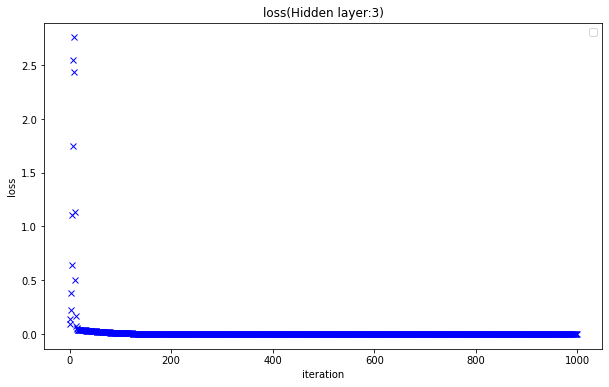

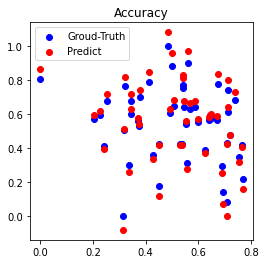

0

In [73]:
# Read files 
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def sorting(l1, l2):
    # l1 and l2 has to be numpy arrays
    idx = np.argsort(l1)
    return l1[idx], l2[idx]

x_train = np.loadtxt('/content/gdrive/My Drive/Colab Notebooks/ML_2022_Fall/Assignment2/X_train.csv')
x_test = np.loadtxt('/content/gdrive/My Drive/Colab Notebooks/ML_2022_Fall/Assignment2/X_test.csv')

y_train = np.loadtxt('/content/gdrive/My Drive/Colab Notebooks/ML_2022_Fall/Assignment2/Y_train.csv')
y_test = np.loadtxt('/content/gdrive/My Drive/Colab Notebooks/ML_2022_Fall/Assignment2/Y_test.csv')

x_train.shape

def normalization(data):
    _range = np.max(data) - np.min(data)
    return (data - np.min(data)) / _range

x_train = normalization(x_train)
x_test = normalization(x_test)

y_train = normalization(y_train)
y_test = normalization(y_test)


num_examples = len(x_train) # training set size
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 1 # output layer dimensionality

# Gradient descent parameters (I picked these by hand)
epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength


def identity_activation_function(x):
  return x

def sigmoid(x):
  return 1.0 / (1.0 + np.exp(-x))

# Helper function to evaluate the total loss on the dataset
#  cross-entropy loss
# def calculate_cross_entropy_loss(model, x_train, y_train):
#     W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
#     # Forward propagation to calculate our predictions
#     z1 = x_train.dot(W1) + b1
#     a1 = np.tanh(z1)
#     z2 = a1.dot(W2) + b2
#     exp_scores = np.exp(z2)
#     # probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

#     # Calculating the loss
#     corect_logprobs = -np.log(probs[range(num_examples), y_train])
#     data_loss = np.sum(corect_logprobs)
#     # Add regulatization term to loss (optional)
#     data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
#     return 1./num_examples * data_loss


def calculate_MSE_loss(model, x_train, y_train):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation to calculate our predictions
    z1 = x_train.dot(W1) + b1
    a1 = sigmoid(z1) # nx3
    z2 = a1.dot(W2) + b2
    a2 = identity_activation_function(z2)  # nx1
    y_hat = a2
    y = y_train.reshape(-1,1)

    # print('y_hat:',y_hat.shape)
    # print('y_train:', y_train.shape)

    loss = (np.square(y - y_hat)).mean()

    return loss

def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = sigmoid(z1)
    z2 = a1.dot(W2) + b2
    a2 = z2
    
    return identity_activation_function(a2)

def calculate_accuracy(model, x_test, y_test):
  y_predict = predict(model, x_test)

  plt.figure(figsize=(4, 4))
  plt.scatter(x_test[:,0], y_test, color='b' ,label='Groud-Truth')
  plt.scatter(x_test[:,0], y_predict, color = 'r', label='Predict')

  plt.legend()
  plt.title('Accuracy')
  plt.show()

  return 0

def plot_loss(nn_hdim, loss_list):
  x = np.arange(len(loss_list))
  y = loss_list
  
  plt.figure(figsize=(10, 6))
  plt.title('loss(Hidden layer:'+str(nn_hdim)+')')
  plt.plot(x, y, 'bx')
  plt.xlabel('iteration')
  plt.ylabel('loss')
  plt.legend()
  plt.show()

  return 0


def plot_accuracy(accuracy_list):
  x = np.arange(len(accuracy_list))
  y = accuracy_list

  # plt.figure(figsize=(10, 6))
  # plt.title('accuracy')
  # plt.plot(x, y, 'bx')
  # plt.xlabel('iteration')
  # plt.ylabel('accuracy')
  # plt.legend()
  # plt.show()

  return 0

# This function learns parameters for the neural network and returns the model.
# - nn_hdim: Number of nodes in the hidden layer
# - num_passes: Number of passes through the training data for gradient descent
# - print_loss: If True, print the loss every 1000 iterations
def build_model(nn_hdim, x_train, y_train, num_passes=2000, print_loss=False):
    
    # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)  # 2x3
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim) # 3x1
    b2 = np.zeros((1, nn_output_dim))

    # This is what we return at the end
    model = {}

    loss_list = []
    
    # Gradient descent. For each batch...
    for i in range(0, num_passes):

        # Forward propagation
        z1 = x_train.dot(W1) + b1
        a1 = sigmoid(z1) # nx3
        z2 = a1.dot(W2) + b2
        a2 = identity_activation_function(z2)  # nx1
        # exp_scores = np.exp(z2)
        # probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        # probs = identity_activation_function(z2)

        # Backpropagation
        y = y_train.reshape(-1,1)
        dW2 = (a1.T).dot(a2-y) # 3x1
        # db2 = np.sum(delta3, axis=0, keepdims=True)
        db2 = np.sum(a2-y, axis=0, keepdims=True)
        # delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        # print('a1:', a1.shape)
        # print('a2:', a2.shape)
        # print('y_train:', y_train.shape)
        # print('W1:', W1.shape)
        # print('W2:', W2.shape)
        # print('tmp:', (a2-y).shape)
        delta2 = (a2-y).dot(W2.T) * a1*(1-a1) # todo n x3
        dW1 = np.dot(x_train.T, delta2) #  2x3
        db1 = np.sum(delta2, axis=0)

        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1

        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        
        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        loss = calculate_MSE_loss(model, x_train, y_train)
        # accuracy = 
        loss_list.append(loss)
        if print_loss and i % 100 == 0:
          print("Loss after iteration %i: %f" %(i, loss))

        if i == num_passes-1:
          print("Loss after iteration %i: %f" %(i, loss))

    plot_loss(nn_hdim, loss_list)

    return model


# Build a model with a 3-dimensional hidden layer
model = build_model(3,x_train, y_train, print_loss=True, num_passes=1000)

calculate_accuracy(model, x_test, y_test)


What is the effect of the learning rate on the training process? Vary the learning rate to bebetween 0.001 and 1.0 and plot the resulting accuracy as a function of learning rate.

Mounted at /content/gdrive/


------------------------------
Learning rate 0.001000
Loss after iteration 0: 0.062535
Loss after iteration 100: 0.042559
Loss after iteration 200: 0.037874
Loss after iteration 300: 0.033388
Loss after iteration 400: 0.029086
Loss after iteration 500: 0.024990
Loss after iteration 600: 0.021138
Loss after iteration 700: 0.017583
Loss after iteration 800: 0.014373
Loss after iteration 900: 0.011544
Loss after iteration 999: 0.009138


<Figure size 1152x2304 with 0 Axes>

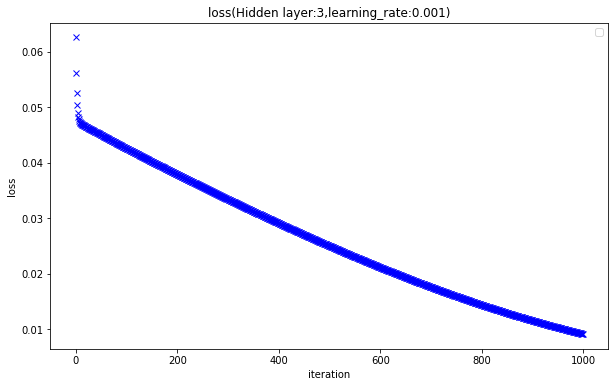

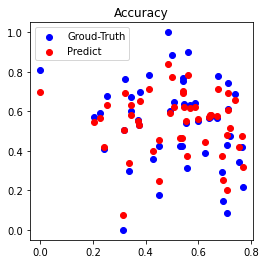

------------------------------
Learning rate 0.005000
Loss after iteration 0: 0.048227
Loss after iteration 100: 0.024823
Loss after iteration 200: 0.009013
Loss after iteration 300: 0.002257
Loss after iteration 400: 0.000556
Loss after iteration 500: 0.000232
Loss after iteration 600: 0.000168
Loss after iteration 700: 0.000149
Loss after iteration 800: 0.000139
Loss after iteration 900: 0.000131
Loss after iteration 999: 0.000124


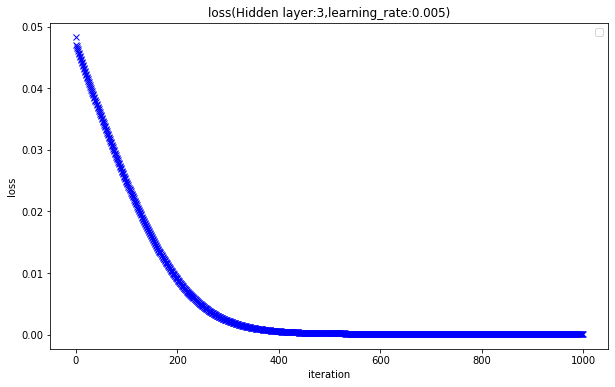

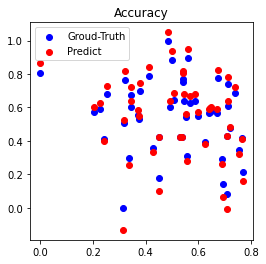

------------------------------
Learning rate 0.010000
Loss after iteration 0: 0.096282
Loss after iteration 100: 0.008501
Loss after iteration 200: 0.000390
Loss after iteration 300: 0.000037
Loss after iteration 400: 0.000022
Loss after iteration 500: 0.000020
Loss after iteration 600: 0.000019
Loss after iteration 700: 0.000018
Loss after iteration 800: 0.000017
Loss after iteration 900: 0.000016
Loss after iteration 999: 0.000016


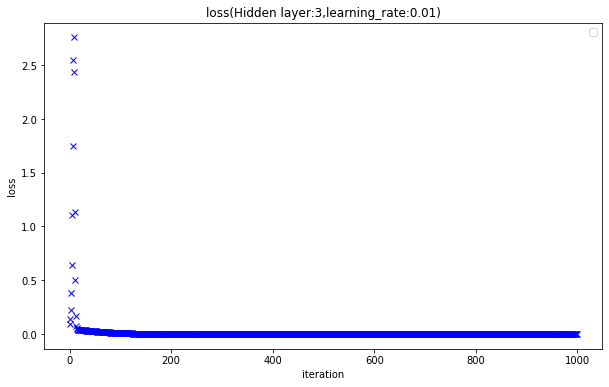

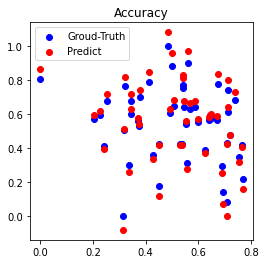

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:159: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:171: RuntimeWarning: invalid value encountered in add


------------------------------
Learning rate 0.050000
Loss after iteration 0: 3.128713
Loss after iteration 100: 33978056376692424040837258208086993302413585381757035456744866164408829675468373810912755747277206151520911683397884051456.000000
Loss after iteration 200: 87739831936344118981923926690937734069350931659787529537520689366466090788049840806749433260386571177818264121230863257834753796370400365993627578211691455268020565651359799798240190791367810848843496882837128648836434727561792492111403155456.000000
Loss after iteration 300: inf
Loss after iteration 400: inf
Loss after iteration 500: inf
Loss after iteration 600: nan
Loss after iteration 700: nan
Loss after iteration 800: nan
Loss after iteration 900: nan
Loss after iteration 999: nan


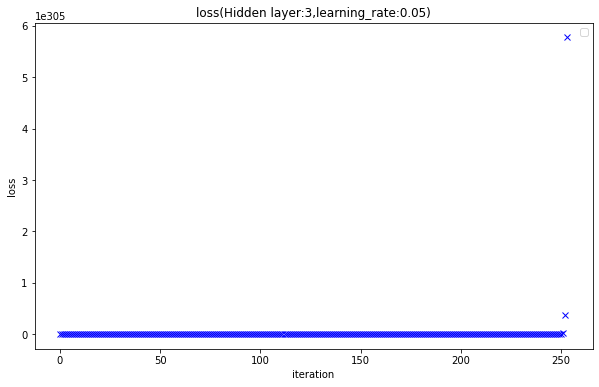

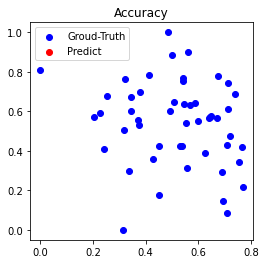

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:159: RuntimeWarning: invalid value encountered in multiply


------------------------------
Learning rate 0.100000
Loss after iteration 0: 13.584119
Loss after iteration 100: 1114623747667630870137894049297666888924937742560718705008333156723439593064531683064853181358797110046801766697949305004909423006540783657119993356928968816159184877141517844870572403605897216.000000
Loss after iteration 200: inf
Loss after iteration 300: inf
Loss after iteration 400: nan
Loss after iteration 500: nan
Loss after iteration 600: nan
Loss after iteration 700: nan
Loss after iteration 800: nan
Loss after iteration 900: nan
Loss after iteration 999: nan


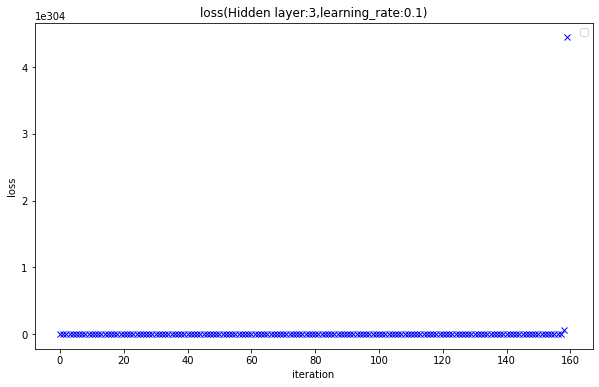

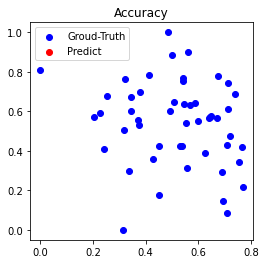

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:159: RuntimeWarning: invalid value encountered in multiply


------------------------------
Learning rate 1.000000
Loss after iteration 0: 1467.351782
Loss after iteration 100: inf
Loss after iteration 200: nan
Loss after iteration 300: nan
Loss after iteration 400: nan
Loss after iteration 500: nan
Loss after iteration 600: nan
Loss after iteration 700: nan
Loss after iteration 800: nan
Loss after iteration 900: nan
Loss after iteration 999: nan


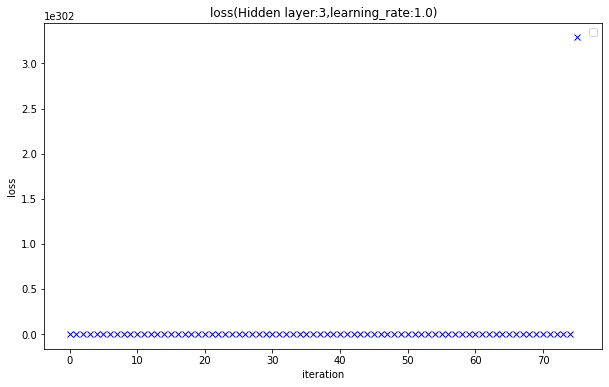

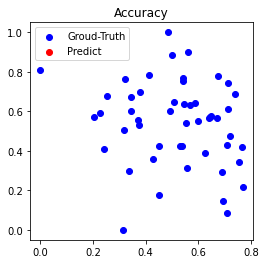

In [1]:
# Read files 
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def sorting(l1, l2):
    # l1 and l2 has to be numpy arrays
    idx = np.argsort(l1)
    return l1[idx], l2[idx]

x_train = np.loadtxt('/content/gdrive/My Drive/Colab Notebooks/ML_2022_Fall/Assignment2/X_train.csv')
x_test = np.loadtxt('/content/gdrive/My Drive/Colab Notebooks/ML_2022_Fall/Assignment2/X_test.csv')

y_train = np.loadtxt('/content/gdrive/My Drive/Colab Notebooks/ML_2022_Fall/Assignment2/Y_train.csv')
y_test = np.loadtxt('/content/gdrive/My Drive/Colab Notebooks/ML_2022_Fall/Assignment2/Y_test.csv')

x_train.shape

def normalization(data):
    _range = np.max(data) - np.min(data)
    return (data - np.min(data)) / _range

x_train = normalization(x_train)
x_test = normalization(x_test)

y_train = normalization(y_train)
y_test = normalization(y_test)


num_examples = len(x_train) # training set size
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 1 # output layer dimensionality

# Gradient descent parameters (I picked these by hand)
epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength


def identity_activation_function(x):
  return x

def sigmoid(x):
  return 1.0 / (1.0 + np.exp(-x))

def calculate_MSE_loss(model, x_train, y_train):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation to calculate our predictions
    z1 = x_train.dot(W1) + b1
    a1 = sigmoid(z1) # nx3
    z2 = a1.dot(W2) + b2
    a2 = identity_activation_function(z2)  # nx1
    y_hat = a2
    y = y_train.reshape(-1,1)

    # print('y_hat:',y_hat.shape)
    # print('y_train:', y_train.shape)

    loss = (np.square(y - y_hat)).mean()

    return loss

def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = sigmoid(z1)
    z2 = a1.dot(W2) + b2
    a2 = z2
    
    return identity_activation_function(a2)

def calculate_accuracy(model, x_test, y_test):
  y_predict = predict(model, x_test)

  plt.figure(figsize=(4, 4))
  plt.scatter(x_test[:,0], y_test, color='b' ,label='Groud-Truth')
  plt.scatter(x_test[:,0], y_predict, color = 'r', label='Predict')

  plt.legend()
  plt.title('Accuracy')
  plt.show()

  return 0

def plot_loss(nn_hdim, loss_list, learning_rate):
  x = np.arange(len(loss_list))
  y = loss_list
  
  plt.figure(figsize=(10, 6))
  plt.title('loss(Hidden layer:'+str(nn_hdim)+ ',learning_rate:'+str(learning_rate) +')' )
  plt.plot(x, y, 'bx')
  plt.xlabel('iteration')
  plt.ylabel('loss')
  plt.legend()
  plt.show()

  return 0


def plot_accuracy(accuracy_list):
  x = np.arange(len(accuracy_list))
  y = accuracy_list

  # plt.figure(figsize=(10, 6))
  # plt.title('accuracy')
  # plt.plot(x, y, 'bx')
  # plt.xlabel('iteration')
  # plt.ylabel('accuracy')
  # plt.legend()
  # plt.show()

  return 0

# This function learns parameters for the neural network and returns the model.
# - nn_hdim: Number of nodes in the hidden layer
# - num_passes: Number of passes through the training data for gradient descent
# - print_loss: If True, print the loss every 1000 iterations
def build_model(nn_hdim, x_train, y_train, num_passes=2000, print_loss=False, learning_rate = 0.01):
    
    # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)  # 2x3
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim) # 3x1
    b2 = np.zeros((1, nn_output_dim))

    # This is what we return at the end
    model = {}

    loss_list = []
    
    # Gradient descent. For each batch...
    for i in range(0, num_passes):

        # Forward propagation
        z1 = x_train.dot(W1) + b1
        a1 = sigmoid(z1) # nx3
        z2 = a1.dot(W2) + b2
        a2 = identity_activation_function(z2)  # nx1
        # exp_scores = np.exp(z2)
        # probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        # probs = identity_activation_function(z2)

        # Backpropagation
        y = y_train.reshape(-1,1)
        dW2 = (a1.T).dot(a2-y) # 3x1
        # db2 = np.sum(delta3, axis=0, keepdims=True)
        db2 = np.sum(a2-y, axis=0, keepdims=True)
        # delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        # print('a1:', a1.shape)
        # print('a2:', a2.shape)
        # print('y_train:', y_train.shape)
        # print('W1:', W1.shape)
        # print('W2:', W2.shape)
        # print('tmp:', (a2-y).shape)
        delta2 = (a2-y).dot(W2.T) * a1*(1-a1) # todo n x3
        dW1 = np.dot(x_train.T, delta2) #  2x3
        db1 = np.sum(delta2, axis=0)

        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1

        # Gradient descent parameter update
        W1 += -learning_rate * dW1
        b1 += -learning_rate * db1
        W2 += -learning_rate * dW2
        b2 += -learning_rate * db2
        
        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        loss = calculate_MSE_loss(model, x_train, y_train)
        # accuracy = 
        loss_list.append(loss)
        if print_loss and i % 100 == 0:
          print("Loss after iteration %i: %f" %(i, loss))

        if i == num_passes-1:
          print("Loss after iteration %i: %f" %(i, loss))

    plot_loss(nn_hdim, loss_list, learning_rate)

    return model



# # Build a model with a 3-dimensional hidden layer
# model = build_model(3,x_train, y_train, num_passes=1000, print_loss=True)
# calculate_accuracy(model, x_test, y_test)

plt.figure(figsize=(16, 32))
learning_rate = [0.001, 0.005, 0.01, 0.05, 0.1, 1.0]
for i, rate in enumerate(learning_rate):
    # plt.subplot(5, 2, i+1)
    # plt.title('Hidden Layer size %d' % nn_hdim)
    print("------------------------------")
    print('Learning rate %f' % rate)
    model = build_model(3, x_train, y_train, num_passes=1000, print_loss=True, learning_rate = rate)
    calculate_accuracy(model, x_test, y_test)
plt.show()


What is the effect of the number of neurons in the hidden layer? To answer this question, you will need to consider and answer the following:

a. You will need to vary the number of neurons from 1 to 10. Does the update rule need to be changed/derived again? Why or why not?

b. Report your observations by reporting the final loss and plotting the true labels and your predicted labels, along with a brief (2-3 lines) description.

Mounted at /content/gdrive/
------------------------------
Hidden Layer size 1
Loss after iteration 0: 0.063799
Loss after iteration 100: 0.039622
Loss after iteration 200: 0.012810
Loss after iteration 300: 0.001058
Loss after iteration 400: 0.000103
Loss after iteration 500: 0.000051
Loss after iteration 600: 0.000043
Loss after iteration 700: 0.000040
Loss after iteration 800: 0.000037
Loss after iteration 900: 0.000034
Loss after iteration 999: 0.000032


<Figure size 1152x2304 with 0 Axes>

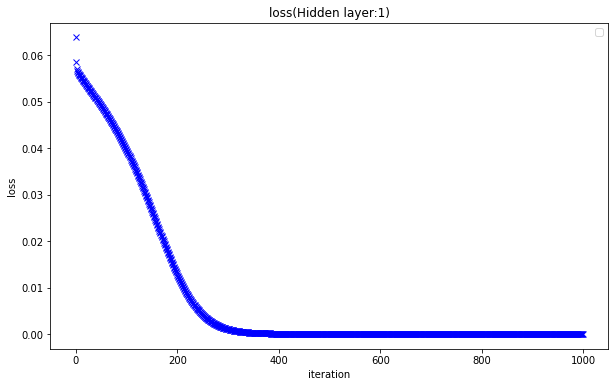

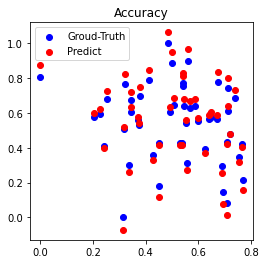

------------------------------
Hidden Layer size 2
Loss after iteration 0: 0.068995
Loss after iteration 100: 0.020683
Loss after iteration 200: 0.002470
Loss after iteration 300: 0.000178
Loss after iteration 400: 0.000032
Loss after iteration 500: 0.000019
Loss after iteration 600: 0.000017
Loss after iteration 700: 0.000017
Loss after iteration 800: 0.000016
Loss after iteration 900: 0.000016
Loss after iteration 999: 0.000016


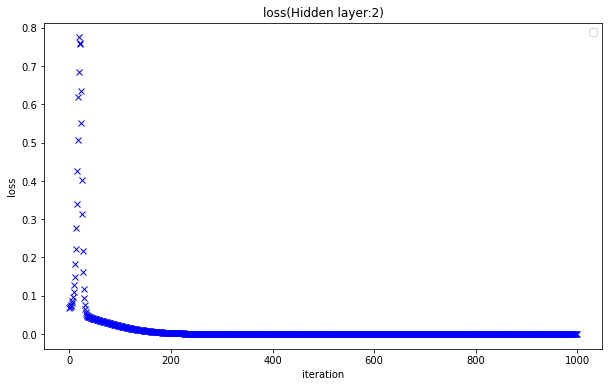

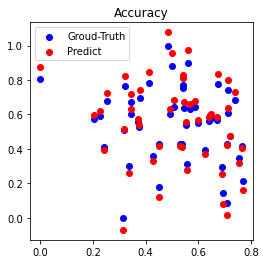

------------------------------
Hidden Layer size 3
Loss after iteration 0: 0.096282
Loss after iteration 100: 0.008501
Loss after iteration 200: 0.000390
Loss after iteration 300: 0.000037
Loss after iteration 400: 0.000022
Loss after iteration 500: 0.000020
Loss after iteration 600: 0.000019
Loss after iteration 700: 0.000018
Loss after iteration 800: 0.000017
Loss after iteration 900: 0.000016
Loss after iteration 999: 0.000016


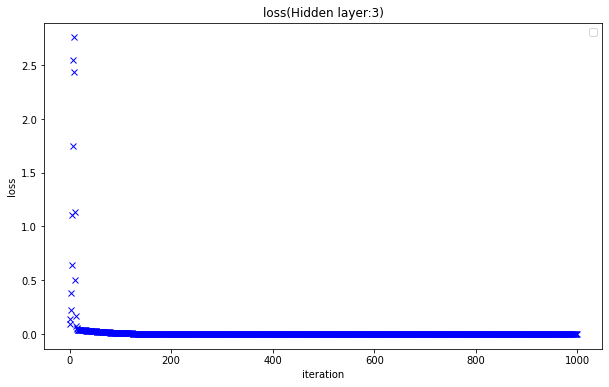

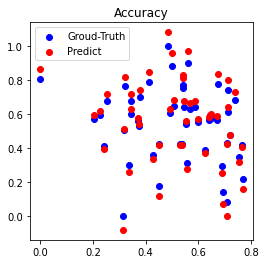

------------------------------
Hidden Layer size 4
Loss after iteration 0: 0.086513
Loss after iteration 100: 0.044821
Loss after iteration 200: 0.013342
Loss after iteration 300: 0.000691
Loss after iteration 400: 0.000099
Loss after iteration 500: 0.000075
Loss after iteration 600: 0.000069
Loss after iteration 700: 0.000066
Loss after iteration 800: 0.000062
Loss after iteration 900: 0.000059
Loss after iteration 999: 0.000056


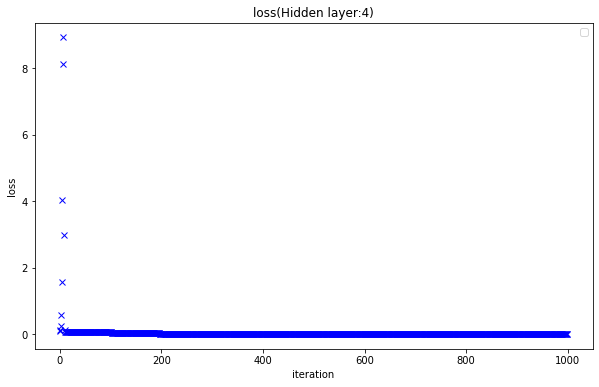

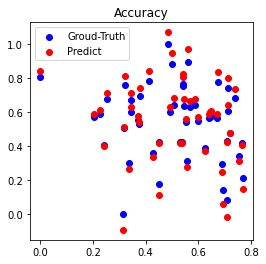

------------------------------
Hidden Layer size 5
Loss after iteration 0: 0.411004
Loss after iteration 100: 0.038151
Loss after iteration 200: 0.019069
Loss after iteration 300: 0.007635
Loss after iteration 400: 0.003270
Loss after iteration 500: 0.001630
Loss after iteration 600: 0.001011
Loss after iteration 700: 0.000765
Loss after iteration 800: 0.000649
Loss after iteration 900: 0.000578
Loss after iteration 999: 0.000525


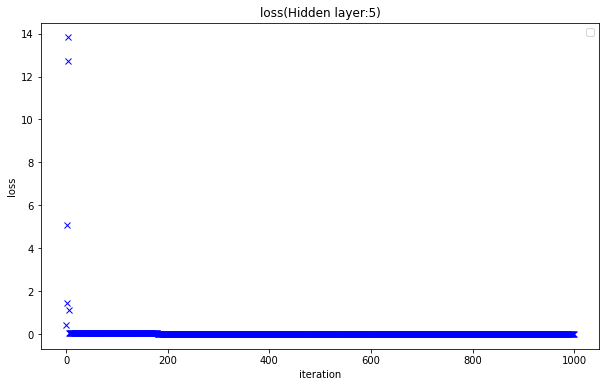

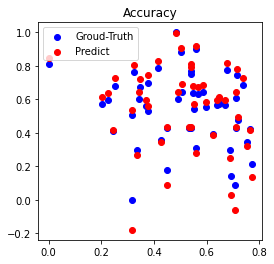

------------------------------
Hidden Layer size 6
Loss after iteration 0: 0.594054
Loss after iteration 100: 0.052015
Loss after iteration 200: 0.048212
Loss after iteration 300: 0.042677
Loss after iteration 400: 0.033665
Loss after iteration 500: 0.019116
Loss after iteration 600: 0.005431
Loss after iteration 700: 0.001510
Loss after iteration 800: 0.000932
Loss after iteration 900: 0.000777
Loss after iteration 999: 0.000697


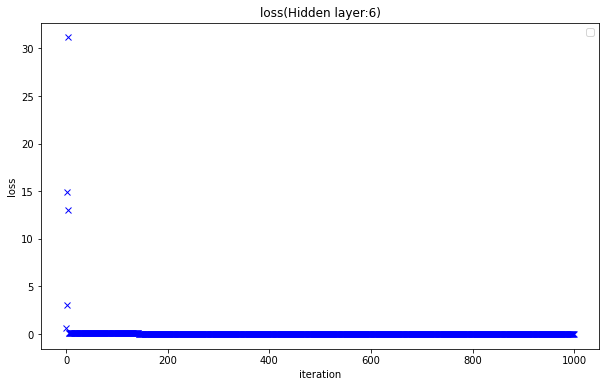

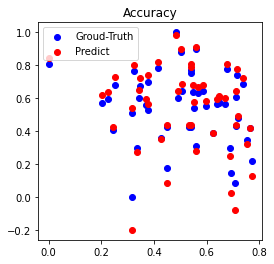

------------------------------
Hidden Layer size 7
Loss after iteration 0: 3.695367
Loss after iteration 100: 0.063012
Loss after iteration 200: 0.061952
Loss after iteration 300: 0.061122
Loss after iteration 400: 0.060424
Loss after iteration 500: 0.059797
Loss after iteration 600: 0.059200
Loss after iteration 700: 0.058597
Loss after iteration 800: 0.057950
Loss after iteration 900: 0.057210
Loss after iteration 999: 0.056315


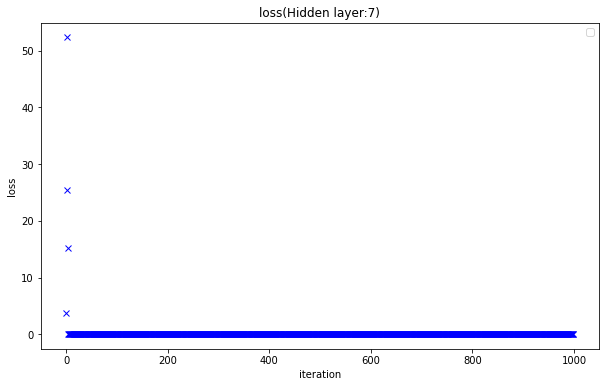

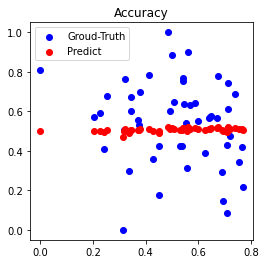

------------------------------
Hidden Layer size 8
Loss after iteration 0: 7.602387
Loss after iteration 100: 0.087329
Loss after iteration 200: 0.080277
Loss after iteration 300: 0.075942
Loss after iteration 400: 0.072979
Loss after iteration 500: 0.070808
Loss after iteration 600: 0.069133
Loss after iteration 700: 0.067786
Loss after iteration 800: 0.066665
Loss after iteration 900: 0.065700
Loss after iteration 999: 0.064849


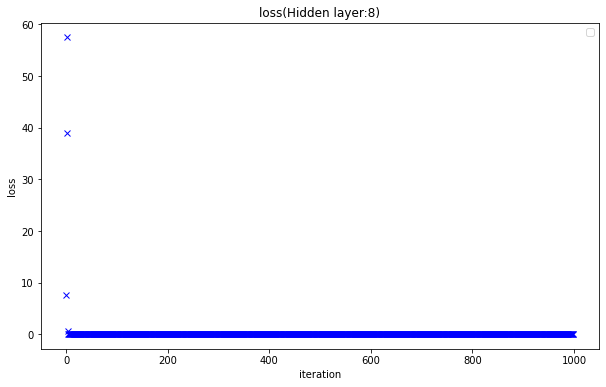

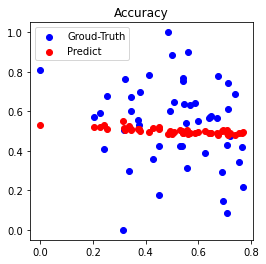

------------------------------
Hidden Layer size 9
Loss after iteration 0: 7.843225
Loss after iteration 100: 0.090489
Loss after iteration 200: 0.083303
Loss after iteration 300: 0.078835
Loss after iteration 400: 0.075760
Loss after iteration 500: 0.073500
Loss after iteration 600: 0.071759
Loss after iteration 700: 0.070369
Loss after iteration 800: 0.069228
Loss after iteration 900: 0.068268
Loss after iteration 999: 0.067453


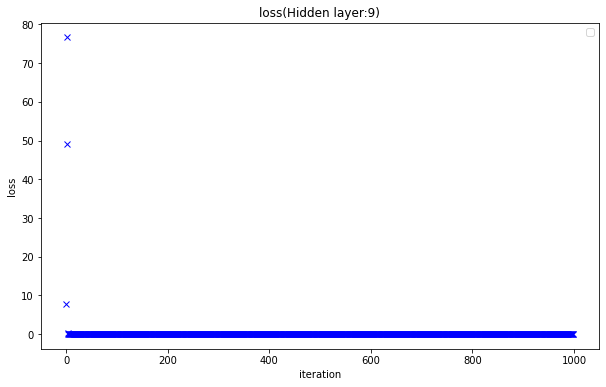

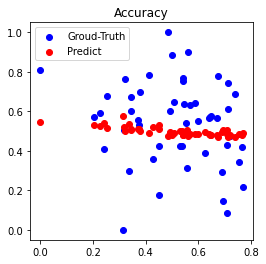

------------------------------
Hidden Layer size 10
Loss after iteration 0: 0.388069
Loss after iteration 100: 0.038537
Loss after iteration 200: 0.034208
Loss after iteration 300: 0.027282
Loss after iteration 400: 0.015121
Loss after iteration 500: 0.003198
Loss after iteration 600: 0.001351
Loss after iteration 700: 0.001191
Loss after iteration 800: 0.001099
Loss after iteration 900: 0.001017
Loss after iteration 999: 0.000943


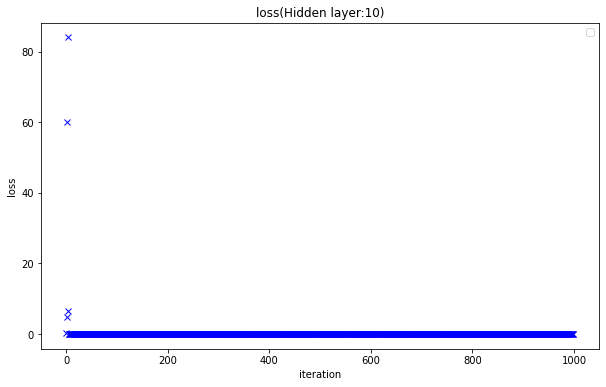

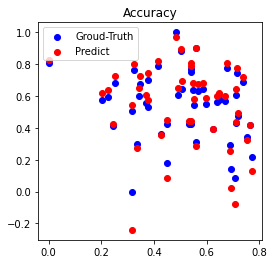

In [69]:
# Read files 
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def sorting(l1, l2):
    # l1 and l2 has to be numpy arrays
    idx = np.argsort(l1)
    return l1[idx], l2[idx]

x_train = np.loadtxt('/content/gdrive/My Drive/Colab Notebooks/ML_2022_Fall/Assignment2/X_train.csv')
x_test = np.loadtxt('/content/gdrive/My Drive/Colab Notebooks/ML_2022_Fall/Assignment2/X_test.csv')

y_train = np.loadtxt('/content/gdrive/My Drive/Colab Notebooks/ML_2022_Fall/Assignment2/Y_train.csv')
y_test = np.loadtxt('/content/gdrive/My Drive/Colab Notebooks/ML_2022_Fall/Assignment2/Y_test.csv')

x_train.shape

def normalization(data):
    _range = np.max(data) - np.min(data)
    return (data - np.min(data)) / _range

x_train = normalization(x_train)
x_test = normalization(x_test)

y_train = normalization(y_train)
y_test = normalization(y_test)


num_examples = len(x_train) # training set size
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 1 # output layer dimensionality

# Gradient descent parameters (I picked these by hand)
epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength


def identity_activation_function(x):
  return x

def sigmoid(x):
  return 1.0 / (1.0 + np.exp(-x))

# Helper function to evaluate the total loss on the dataset
#  cross-entropy loss
# def calculate_cross_entropy_loss(model, x_train, y_train):
#     W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
#     # Forward propagation to calculate our predictions
#     z1 = x_train.dot(W1) + b1
#     a1 = np.tanh(z1)
#     z2 = a1.dot(W2) + b2
#     exp_scores = np.exp(z2)
#     # probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

#     # Calculating the loss
#     corect_logprobs = -np.log(probs[range(num_examples), y_train])
#     data_loss = np.sum(corect_logprobs)
#     # Add regulatization term to loss (optional)
#     data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
#     return 1./num_examples * data_loss


def calculate_MSE_loss(model, x_train, y_train):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation to calculate our predictions
    z1 = x_train.dot(W1) + b1
    a1 = sigmoid(z1) # nx3
    z2 = a1.dot(W2) + b2
    a2 = identity_activation_function(z2)  # nx1
    y_hat = a2
    y = y_train.reshape(-1,1)

    # print('y_hat:',y_hat.shape)
    # print('y_train:', y_train.shape)

    loss = (np.square(y - y_hat)).mean()

    return loss

def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = sigmoid(z1)
    z2 = a1.dot(W2) + b2
    a2 = z2
    
    return identity_activation_function(a2)

def calculate_accuracy(model, x_test, y_test):
  y_predict = predict(model, x_test)

  plt.figure(figsize=(4, 4))
  plt.scatter(x_test[:,0], y_test, color='b' ,label='Groud-Truth')
  plt.scatter(x_test[:,0], y_predict, color = 'r', label='Predict')

  plt.legend()
  plt.title('Accuracy')
  plt.show()

  return 0

def plot_loss(nn_hdim, loss_list):
  x = np.arange(len(loss_list))
  y = loss_list
  
  plt.figure(figsize=(10, 6))
  plt.title('loss(Hidden layer:'+str(nn_hdim)+')')
  plt.plot(x, y, 'bx')
  plt.xlabel('iteration')
  plt.ylabel('loss')
  plt.legend()
  plt.show()

  return 0


def plot_accuracy(accuracy_list):
  x = np.arange(len(accuracy_list))
  y = accuracy_list

  # plt.figure(figsize=(10, 6))
  # plt.title('accuracy')
  # plt.plot(x, y, 'bx')
  # plt.xlabel('iteration')
  # plt.ylabel('accuracy')
  # plt.legend()
  # plt.show()

  return 0

# This function learns parameters for the neural network and returns the model.
# - nn_hdim: Number of nodes in the hidden layer
# - num_passes: Number of passes through the training data for gradient descent
# - print_loss: If True, print the loss every 1000 iterations
def build_model(nn_hdim, x_train, y_train, num_passes=2000, print_loss=False):
    
    # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)  # 2x3
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim) # 3x1
    b2 = np.zeros((1, nn_output_dim))

    # This is what we return at the end
    model = {}

    loss_list = []
    
    # Gradient descent. For each batch...
    for i in range(0, num_passes):

        # Forward propagation
        z1 = x_train.dot(W1) + b1
        a1 = sigmoid(z1) # nx3
        z2 = a1.dot(W2) + b2
        a2 = identity_activation_function(z2)  # nx1
        # exp_scores = np.exp(z2)
        # probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        # probs = identity_activation_function(z2)

        # Backpropagation
        y = y_train.reshape(-1,1)
        dW2 = (a1.T).dot(a2-y) # 3x1
        # db2 = np.sum(delta3, axis=0, keepdims=True)
        db2 = np.sum(a2-y, axis=0, keepdims=True)
        # delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        # print('a1:', a1.shape)
        # print('a2:', a2.shape)
        # print('y_train:', y_train.shape)
        # print('W1:', W1.shape)
        # print('W2:', W2.shape)
        # print('tmp:', (a2-y).shape)
        delta2 = (a2-y).dot(W2.T) * a1*(1-a1) # todo n x3
        dW1 = np.dot(x_train.T, delta2) #  2x3
        db1 = np.sum(delta2, axis=0)

        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1

        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        
        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        loss = calculate_MSE_loss(model, x_train, y_train)
        # accuracy = 
        loss_list.append(loss)
        if print_loss and i % 100 == 0:
          print("Loss after iteration %i: %f" %(i, loss))

        if i == num_passes-1:
          print("Loss after iteration %i: %f" %(i, loss))

    plot_loss(nn_hdim, loss_list)

    return model



# # Build a model with a 3-dimensional hidden layer
# model = build_model(3,x_train, y_train, num_passes=1000, print_loss=True)
# calculate_accuracy(model, x_test, y_test)

plt.figure(figsize=(16, 32))
hidden_layer_dimensions = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    # plt.subplot(5, 2, i+1)
    # plt.title('Hidden Layer size %d' % nn_hdim)
    print("------------------------------")
    print('Hidden Layer size %d' % nn_hdim)
    model = build_model(nn_hdim,x_train, y_train, num_passes=1000, print_loss=True)
    calculate_accuracy(model, x_test, y_test)
plt.show()


What is the effect of the activation functions in the network? Explore two different activation functions other than sigmoid such as tanh, linear, or ReLU.

**Tanh** 

Mounted at /content/gdrive/
Loss after iteration 0: 0.053361
Loss after iteration 100: 0.008509
Loss after iteration 200: 0.000640
Loss after iteration 300: 0.000470
Loss after iteration 400: 0.000353
Loss after iteration 500: 0.000268
Loss after iteration 600: 0.000206
Loss after iteration 700: 0.000159
Loss after iteration 800: 0.000125
Loss after iteration 900: 0.000098
Loss after iteration 999: 0.000079


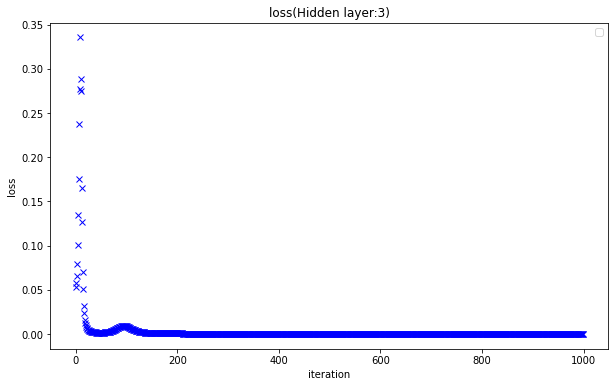

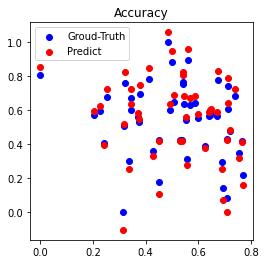

0

In [72]:
# Read files 
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def sorting(l1, l2):
    # l1 and l2 has to be numpy arrays
    idx = np.argsort(l1)
    return l1[idx], l2[idx]

x_train = np.loadtxt('/content/gdrive/My Drive/Colab Notebooks/ML_2022_Fall/Assignment2/X_train.csv')
x_test = np.loadtxt('/content/gdrive/My Drive/Colab Notebooks/ML_2022_Fall/Assignment2/X_test.csv')

y_train = np.loadtxt('/content/gdrive/My Drive/Colab Notebooks/ML_2022_Fall/Assignment2/Y_train.csv')
y_test = np.loadtxt('/content/gdrive/My Drive/Colab Notebooks/ML_2022_Fall/Assignment2/Y_test.csv')

x_train.shape


def normalization(data):
    _range = np.max(data) - np.min(data)
    return (data - np.min(data)) / _range

x_train = normalization(x_train)
x_test = normalization(x_test)

y_train = normalization(y_train)
y_test = normalization(y_test)



num_examples = len(x_train) # training set size
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 1 # output layer dimensionality

# Gradient descent parameters (I picked these by hand)
epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength


def identity_activation_function(x):
  return x

def sigmoid(x):
  return 1.0 / (1.0 + np.exp(-x))

def calculate_MSE_loss(model, x_train, y_train):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation to calculate our predictions
    z1 = x_train.dot(W1) + b1
    a1 = np.tanh(z1) # nx3
    z2 = a1.dot(W2) + b2
    a2 = identity_activation_function(z2)  # nx1
    y_hat = a2
    y = y_train.reshape(-1,1)

    # print('y_hat:',y_hat.shape)
    # print('y:', y.shape)

    loss = (np.square(y - y_hat)).mean()
    # print('loss:', loss)

    return loss

# Helper function to predict an output (0 or 1)
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    a2 = z2
   
    return identity_activation_function(a2)

def calculate_accuracy(model, x_test, y_test):
  y_predict = predict(model, x_test)

  plt.figure(figsize=(4, 4))
  plt.scatter(x_test[:,0], y_test, color='b' ,label='Groud-Truth')
  plt.scatter(x_test[:,0], y_predict, color = 'r', label='Predict')

  plt.legend()
  plt.title('Accuracy')
  plt.show()

  return 0

def plot_loss(nn_hdim, loss_list):
  x = np.arange(len(loss_list))
  y = loss_list
  
  plt.figure(figsize=(10, 6))
  plt.title('loss(Hidden layer:'+str(nn_hdim)+')')
  plt.plot(x, y, 'bx')
  plt.xlabel('iteration')
  plt.ylabel('loss')
  plt.legend()
  plt.show()

  return 0


def plot_accuracy(accuracy_list):
  x = np.arange(len(accuracy_list))
  y = accuracy_list


  # plt.figure(figsize=(10, 6))
  # plt.title('accuracy')
  # plt.plot(x, y, 'bx')
  # plt.xlabel('iteration')
  # plt.ylabel('accuracy')
  # plt.legend()
  # plt.show()

  return 0

# This function learns parameters for the neural network and returns the model.
# - nn_hdim: Number of nodes in the hidden layer
# - num_passes: Number of passes through the training data for gradient descent
# - print_loss: If True, print the loss every 1000 iterations
def build_model(nn_hdim, x_train, y_train, num_passes=1000, print_loss=False):
    
    # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)  # 2x3
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim) # 3x1
    b2 = np.zeros((1, nn_output_dim))

    # This is what we return at the end
    model = {}

    loss_list = []
    
    # Gradient descent. For each batch...
    for i in range(0, num_passes):

        # Forward propagation
        z1 = x_train.dot(W1) + b1
        a1 = np.tanh(z1) # nx3
        z2 = a1.dot(W2) + b2
        a2 = identity_activation_function(z2)  # nx1

        # Backpropagation
        y = y_train.reshape(-1,1)
        dW2 = (a1.T).dot(a2-y) # 3x1
        # db2 = np.sum(delta3, axis=0, keepdims=True)
        db2 = np.sum(a2-y, axis=0, keepdims=True)
        # print("db2:", db2)
        # delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        delta2 = (a2-y).dot(W2.T)* (1 - np.power(a1, 2))
        # print('a1:', a1.shape)
        # print('a2:', a2.shape)
        # print('y_train:', y_train.shape)
        # print('W1:', W1.shape)
        # print('W2:', W2.shape)
        # print('tmp:', (a2-y).shape)

        # a1: (100, 3)
        # a2: (100, 1)
        # y_train: (100,)
        # W1: (2, 3)
        # W2: (3, 1)
        # tmp: (100, 1)

        # delta2 = (a2-y).dot(W2.T) * a1*(1-a1) # todo n x3
        dW1 = np.dot(x_train.T, delta2) #  2x3
        db1 = np.sum(delta2, axis=0)

        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1

        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        
        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        loss = calculate_MSE_loss(model, x_train, y_train)
        # accuracy = 
        loss_list.append(loss)
        if print_loss and i % 100 == 0:
          print("Loss after iteration %i: %f" %(i, loss))

        if i == num_passes-1:
          print("Loss after iteration %i: %f" %(i, loss))

    plot_loss(nn_hdim, loss_list)

    return model


# Build a model with a 3-dimensional hidden layer
model = build_model(3,x_train, y_train, num_passes=1000, print_loss=True)
calculate_accuracy(model, x_test, y_test)


**ReLu**

In [ ]:
def relu(z):
    return np.maximum(0,z)

Mounted at /content/gdrive/
Loss after iteration 0: 0.487682
Loss after iteration 100: 2.990869
Loss after iteration 200: 2.673430
Loss after iteration 300: 2.722052
Loss after iteration 400: 2.719781
Loss after iteration 500: 2.715631


Loss after iteration 600: 2.701842
Loss after iteration 700: 2.666281
Loss after iteration 800: 2.635753
Loss after iteration 900: 2.608499
Loss after iteration 999: 3.019229


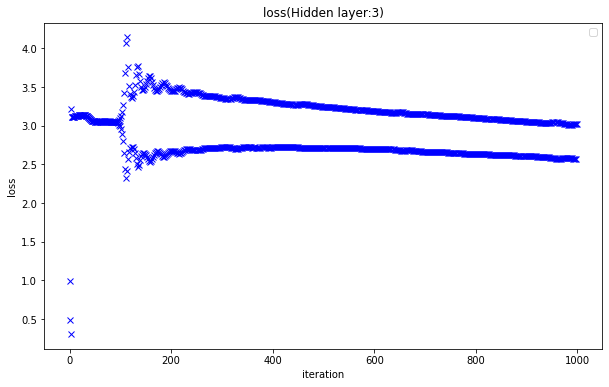

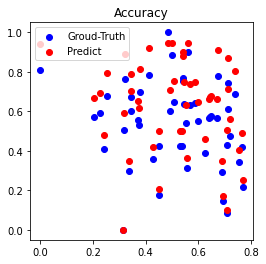

0

In [80]:
# Read files 
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def sorting(l1, l2):
    # l1 and l2 has to be numpy arrays
    idx = np.argsort(l1)
    return l1[idx], l2[idx]

x_train = np.loadtxt('/content/gdrive/My Drive/Colab Notebooks/ML_2022_Fall/Assignment2/X_train.csv')
x_test = np.loadtxt('/content/gdrive/My Drive/Colab Notebooks/ML_2022_Fall/Assignment2/X_test.csv')

y_train = np.loadtxt('/content/gdrive/My Drive/Colab Notebooks/ML_2022_Fall/Assignment2/Y_train.csv')
y_test = np.loadtxt('/content/gdrive/My Drive/Colab Notebooks/ML_2022_Fall/Assignment2/Y_test.csv')

x_train.shape


def normalization(data):
    _range = np.max(data) - np.min(data)
    return (data - np.min(data)) / _range

x_train = normalization(x_train)
x_test = normalization(x_test)

y_train = normalization(y_train)
y_test = normalization(y_test)



num_examples = len(x_train) # training set size
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 1 # output layer dimensionality

# Gradient descent parameters (I picked these by hand)
epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength


def identity_activation_function(x):
  return x

def sigmoid(x):
  return 1.0 / (1.0 + np.exp(-x))

def relu(z):
    return np.maximum(0,z)

def d_relu(z):
    z[z>0]=1
    z[z<=0]=0
    return z

def calculate_MSE_loss(model, x_train, y_train):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation to calculate our predictions
    z1 = x_train.dot(W1) + b1
    a1 = np.tanh(z1) # nx3
    z2 = a1.dot(W2) + b2
    a2 = identity_activation_function(z2)  # nx1
    y_hat = a2
    y = y_train.reshape(-1,1)

    # print('y_hat:',y_hat.shape)
    # print('y:', y.shape)

    loss = (np.square(y - y_hat)).mean()
    # print('loss:', loss)

    return loss

# Helper function to predict an output (0 or 1)
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = relu(z1)
    z2 = a1.dot(W2) + b2
    a2 = z2
   
    return identity_activation_function(a2)

def calculate_accuracy(model, x_test, y_test):
  y_predict = predict(model, x_test)

  plt.figure(figsize=(4, 4))
  plt.scatter(x_test[:,0], y_test, color='b' ,label='Groud-Truth')
  plt.scatter(x_test[:,0], y_predict, color = 'r', label='Predict')

  plt.legend()
  plt.title('Accuracy')
  plt.show()

  return 0

def plot_loss(nn_hdim, loss_list):
  x = np.arange(len(loss_list))
  y = loss_list
  
  plt.figure(figsize=(10, 6))
  plt.title('loss(Hidden layer:'+str(nn_hdim)+')')
  plt.plot(x, y, 'bx')
  plt.xlabel('iteration')
  plt.ylabel('loss')
  plt.legend()
  plt.show()

  return 0



# This function learns parameters for the neural network and returns the model.
# - nn_hdim: Number of nodes in the hidden layer
# - num_passes: Number of passes through the training data for gradient descent
# - print_loss: If True, print the loss every 1000 iterations
def build_model(nn_hdim, x_train, y_train, num_passes=1000, print_loss=False):
    
    # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)  # 2x3
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim) # 3x1
    b2 = np.zeros((1, nn_output_dim))

    # This is what we return at the end
    model = {}

    loss_list = []
    
    # Gradient descent. For each batch...
    for i in range(0, num_passes):

        # Forward propagation
        z1 = x_train.dot(W1) + b1
        a1 = relu(z1) # nx3
        z2 = a1.dot(W2) + b2
        a2 = identity_activation_function(z2)  # nx1

        # Backpropagation
        y = y_train.reshape(-1,1)
        dW2 = (a1.T).dot(a2-y) # 3x1
        # db2 = np.sum(delta3, axis=0, keepdims=True)
        db2 = np.sum(a2-y, axis=0, keepdims=True)
        # print("db2:", db2)
        delta2 = (a2-y).dot(W2.T)* d_relu(z1)

        # delta2 = (a2-y).dot(W2.T) * a1*(1-a1) # todo n x3
        dW1 = np.dot(x_train.T, delta2) #  2x3
        db1 = np.sum(delta2, axis=0)

        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1

        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        
        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        loss = calculate_MSE_loss(model, x_train, y_train)
        # accuracy = 
        loss_list.append(loss)
        if print_loss and i % 100 == 0:
          print("Loss after iteration %i: %f" %(i, loss))

        if i == num_passes-1:
          print("Loss after iteration %i: %f" %(i, loss))

    plot_loss(nn_hdim, loss_list)

    return model


# Build a model with a 3-dimensional hidden layer
model = build_model(3,x_train, y_train, num_passes=1000, print_loss=True)
calculate_accuracy(model, x_test, y_test)


**Answer the following questions:**

1. What is the activation function that you will choose for the output layer Justify your answer briefly.

**Solution:** Linear activation function(Identity activation function) for regression problems.

2. How many neurons should there be in the output layer? Why?

**Solution:** 1 neuron for regression problems.

3. Report the average MSE loss and the accuracy.

**Solution:** MSE loss: 0.000016 of sigmoid activation fuction.

4. Plot the loss and accuracy as a function of the number of iterations.

**Solution:** Please check the figure above

5. What is the effect of the learning rate on the training process? Vary the learning rate to be between 0.001 and 1.0 and plot the resulting accuracy as a function of learning rate.
**Solution:** Learning rate is a hyper-parameter that controls how much we are adjusting the weights of our network with respect the loss gradien. As we change the rate, we can see when rate=0.001, the loss is the minum with 0.000016. If the learning rate is smaller, we need to train more time to get the better results. If the learning rate is large, it is hard to learn a good model as the weights always jump.

6. What is the effect of the number of neurons in the hidden layer? To answer this question, you will need to consider and answer the following:
a. You will need to vary the number of neurons from 1 to 10. Does the update rule need to be changed/derived again? Why or why not?
b. Report your observations by reporting the final loss and plotting the true labels and your predicted labels, along with a brief (2-3 lines) description.

**Solution:** a) we do not need to update the rule, due to the rule formula, the number of neurals just affects the Weights
b) The number of neurons will affect the results, but we can not increase the number all the time, more neurons may lead to overfitting, it may lead to the loss to be Nan, which make the neural network worse. Exploding Gradient Problem could be seen if the number is 9,10, is caused by continually multiplying gradients through network layers with values greater than 1.0. Instead We can increase the layers to get better results.

7. What is the effect of the activation functions in the network? Explore two different activation functions other than sigmoid such as tanh, linear, or ReLU.
a. Will you need to change the update rule?
b. What is the change that you need to make to achieve this experiment?
c. Report your observations by reporting the final loss and plotting the true labels and your predicted labels, along with a brief (2-3 lines) description.

**Solution:** a)Yes, we need to update the rule regarding different activation functions.  b)We need to change the forward function, the backpogation process, the update rule, for the network, we do not need to change the output layer.
c) Sigmoid loss: 0.000016, tanh loss:0.000098,Relu:3.019229, we can see the results of sigmoid is better when use sigmoid as activation function for hidden layer, the ReLu function is the worst
